In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.drop(['PassengerId', 'SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [7]:
df.drop('Name', axis=1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [11]:
def fill_age(x):
    avg = x.mean()
    return x.fillna(avg)

In [14]:
df['Age'] = df.groupby('Pclass').Age.transform(fill_age)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
dtype: int64

In [17]:
df.dropna(inplace=True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [20]:
df_ohe = pd.get_dummies(df)
df_ohe

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.00000,7.2500,0,1,0,0,1
1,1,1,38.00000,71.2833,1,0,1,0,0
2,1,3,26.00000,7.9250,1,0,0,0,1
3,1,1,35.00000,53.1000,1,0,0,0,1
4,0,3,35.00000,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,13.0000,0,1,0,0,1
887,1,1,19.00000,30.0000,1,0,0,0,1
888,0,3,25.14062,23.4500,1,0,0,0,1
889,1,1,26.00000,30.0000,0,1,1,0,0


In [21]:
y = df_ohe['Survived']
x = df_ohe.drop('Survived', axis=1)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=111)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()

In [25]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import classification_report

In [29]:
preds = dt.predict(x_test)

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       163
           1       0.73      0.77      0.75       104

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [44]:
dt.feature_importances_

array([0.09655973, 0.27386809, 0.31751529, 0.26546107, 0.        ,
       0.01443449, 0.00890755, 0.02325378])

In [45]:
from sklearn.tree import plot_tree

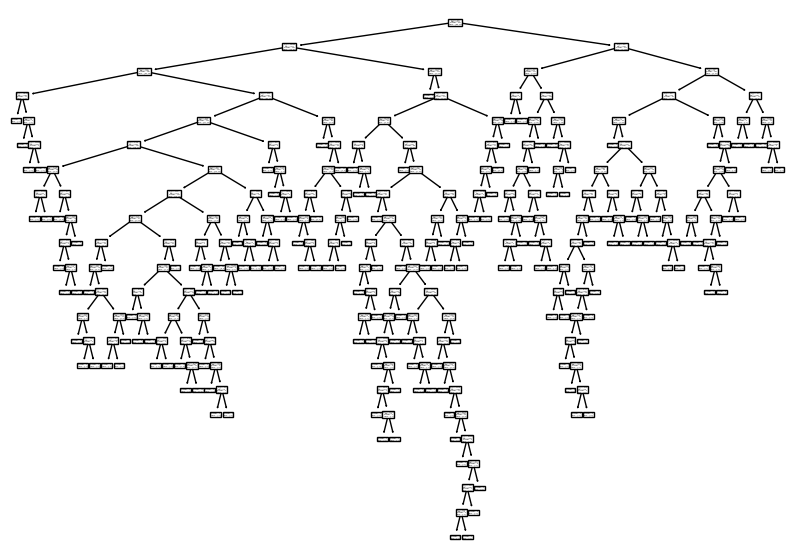

In [46]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators = 200)

In [37]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [38]:
preds = rfc.predict(x_test)

In [39]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       163
           1       0.77      0.78      0.78       104

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.82       267
weighted avg       0.82      0.82      0.82       267



In [43]:
x_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [41]:
rfc.feature_importances_

array([0.09754048, 0.31086043, 0.31238639, 0.121552  , 0.12694778,
       0.01100593, 0.00830475, 0.01140224])